In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as Math
from gurobipy import  *
np.random.seed(69)

In [2]:
file_path = r"D:\GitHub\ml_331\Optimisation\Qn6_dataset.txt"
dataset = np.genfromtxt(file_path, delimiter=' ')
np.random.shuffle(dataset)
val_y = dataset[1400:,2]
val_x = dataset[1400:,0:2]
y = dataset[:1400,2]
x = dataset[:1400,0:2]

In [3]:
x.shape

(1400, 2)

In [4]:
y

array([-1.,  1., -1., ...,  1., -1.,  1.])

### Q6

In [5]:
def sig(x):
    return 1/ (1 + Math.e**-x)

In [6]:
def L_w(x,w,y):
    sum  = 0
    for i in range(y.shape[0]):
        sum += -Math.log(sig(y[i]* (x[i]@w)[0]))
    return sum

In [7]:
w = np.array([[1],[1]])
w
w_ = w.copy()
w

array([[1],
       [1]])

In [8]:
L_w(x,w,y)

90.9065537078593

In [9]:
def dL_w(x,w,y):
    sum = np.zeros(x.shape[1])
    for i in range(y.shape[0]):
        sum += (1 - sig(y[i]* (w.T@x[i])[0]) )*(y[i]*x[i])
    return -sum


In [10]:
dL_w(x,w,y)

array([  42.23721502, -175.48826741])

In [11]:
def d2L_w(x,w,y):
    sum = np.zeros((w.shape[0],w.shape[0]))
    for i in range(y.shape[0]):
        sum += (sig(y[i]* (w.T@x[i])[0])) * (1 - sig(y[i]* (w.T@x[i])[0]) ) * np.array([y[i]*x[i]]).T @ np.array([y[i]*x[i]])
    return sum

In [12]:
d2L_w(x,w,y)

array([[ 86.59685787, -57.71182274],
       [-57.71182274, 377.73688598]])

### (c)

In [13]:
alpha = 1e-2
tolerance = 1e-5
w_old = w.copy()
iter = 0
l_w = []
while(True):
    w = w_old - alpha * np.array([dL_w(x,w_old,y)]).T
    iter +=1
    l_w.append(L_w(x,w,y))
    if(abs(L_w(x,w,y) - L_w(x,w_old,y)) < tolerance):
        break
    w_old = w

# step size is alpha = 1e-1
# Stopping Condition: f(x_k+1) - f(x_k) < tolerance
print("Converged Weights:",w)

Converged Weights: [[ 4.49419823]
 [14.9558697 ]]


### (d)

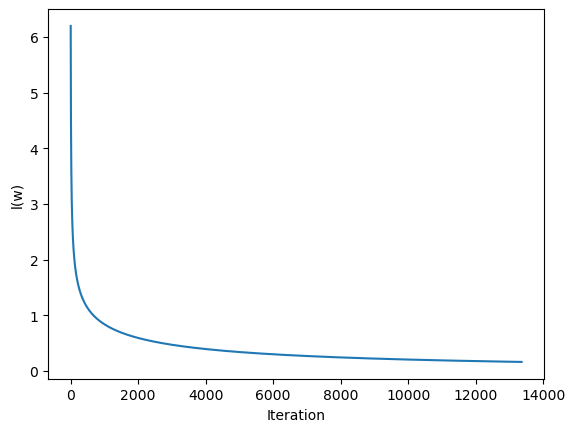

In [14]:
plt.xlabel('Iteration')
plt.ylabel('l(w)')
plt.plot(l_w)
plt.show()

### (e)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


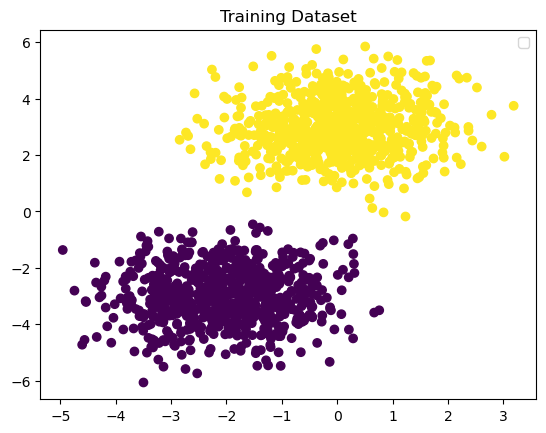

In [15]:

plt.title("Training Dataset")
plt.scatter(x[:,0],x[:,1],c=(y+1)*50, cmap='viridis')
plt.legend()
plt.show()

In [16]:
x1 = np.linspace(-5, 5, 100)
x2 = []
x3 = []
for i in range(100):
    x2.append(-w[0][0]*x1[i] / w[1][0] )
    x3.append(-w_[0][0]*x1[i] / w_[1][0])

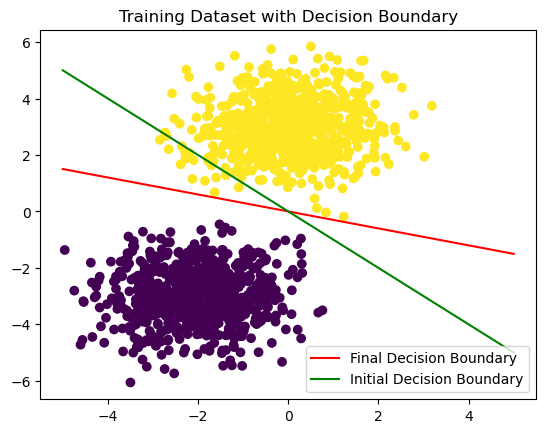

In [17]:
plt.title("Training Dataset with Decision Boundary")
plt.scatter(x[:,0],x[:,1],c=(y+1)*50, cmap='viridis')
plt.plot(x1,x2,label='Final Decision Boundary', color='r')
plt.plot(x1,x3,label='Initial Decision Boundary', color='g')
plt.legend()
plt.show()

### (f)

In [18]:
def MisclassifiedError(y,y_hat):
    return np.sum(abs(y - y_hat))/(2 * y.shape[0])

In [19]:
def classify(w,x):
    y = []
    for i in range(x.shape[0]):
        if( sig((w.T@x[i])[0]) >= 0.5):
            y.append(1)
        else:
            y.append(-1)
    return np.array(y)

In [20]:
y_hat = classify(w,val_x)
print("MisclassifiedError:",MisclassifiedError(val_y,y_hat))

MisclassifiedError: 0.0


### (g)

In [21]:
def steepest_gradient(w_old,alpha = 1):
    tolerance = 1e-6
    iter = 0
    while(True):
        w = w_old - alpha * np.array([dL_w(x,w_old,y)]).T
        iter +=1
        if(abs(L_w(x,w,y) - L_w(x,w_old,y)) < tolerance):
            break
        w_old = w
    return L_w(x,w,y)


In [22]:
w_different = np.array( [[[1],[0]], [[1],[1]], [[100],[1000]], [[-100],[-20]], [[10],[-20]]]  )
for i in range(w_different.shape[0]):
    print("For Initial w:\n",w_different[i],"\nL(w):",steepest_gradient(w_different[i]))

For Initial w:
 [[1]
 [0]] 
L(w): 0.000802439242192811
For Initial w:
 [[1]
 [1]] 
L(w): 0.0008020778958120732
For Initial w:
 [[ 100]
 [1000]] 
L(w): 0.0008025988451653308
For Initial w:
 [[-100]
 [ -20]] 
L(w): 0.000564819793251799
For Initial w:
 [[ 10]
 [-20]] 
L(w): 0.0


### (h)

In [23]:
def x_convergence(x1,x2,f_x1,f_x2):
    tolerance = 1e-5
    if(np.linalg.norm(x1 -x2) < tolerance):
        return True
    return False

In [24]:
def fx_convergence(x1,x2,f_x1,f_x2):
    tolerance = 1e-5
    if(abs(f_x1 -f_x2) < tolerance):
        return True
    return False

In [34]:
def steepest_gradient(w_,alpha,alphaFactor = 1,stopCriterion = fx_convergence):
    iter = 0
    while(True):
        w = w_ - alpha * np.array([dL_w(x,w_,y)]).T
        if(alphaFactor >= 0):
            alpha = alpha* alphaFactor
        elif(alphaFactor < 0):
                alpha = alpha + 1/(iter+1)
        iter +=1
        if(stopCriterion(w_,w,L_w(x,w_,y),L_w(x,w,y))):
            break
        w_ = w
    return L_w(x,w,y),w,iter

In [27]:
### Checking alpha = 1e-1 with fx Convergence criterion
w_g = w_.copy()
minL,w,iter = steepest_gradient(w_g,1e-1,1,fx_convergence)
print("Stopping Criterion: fx convergence. For Constant Alpha:",1e-2,"=> Converged weights:",w.T,"=> No of Iterations:",iter,"L(w*)",minL)

Stopping Criterion: fx convergence. For Constant Alpha: 0.01 => Converged weights: [[ 6.18900635 20.68826668]] => No of Iterations: 2507 L(w*) 0.052926290316375975


In [36]:
w_g = w_.copy()
minL,w,iter = steepest_gradient(w_g,1,0.9999,fx_convergence)
print("Stopping Criterion: fx convergence. For Pseudo Diminishing Step Size Factor:",0.9999,"=> Converged weights:",w.T,"=> No of Iterations:",iter,"L(w*)",minL)

Stopping Criterion: fx convergence. For Pseudo Diminishing Step Size Factor: 0.9999 => Converged weights: [[ 29.63817408 169.7273722 ]] => No of Iterations: 292 L(w*) 0.0025681085291555557


In [35]:
## Diminishing Gradient with alpha = sum(1 + 1/n) sequence. This sequence is bounded but sum is infinite
w_g = w_.copy()
minL,w,iter = steepest_gradient(w_g,1e-3,-1,fx_convergence)
print("Stopping Criterion: x convergence. For Diminishing Step Size Factor:","=> Converged weights:",w.T,"=> No of Iterations:",iter,"L(w*)",minL)

Stopping Criterion: x convergence. For Diminishing Step Size Factor: => Converged weights: [[ 22.51307529 116.07806347]] => No of Iterations: 137 L(w*) 0.0010676811880585555


### (I)

In [ ]:
tolerance = 0.01
w_old = w_.copy()
iter = 0
while(True):
    w_new = w_old - np.linalg.inv(d2L_w(x,w_old,y)) @ dL_w(x,w_old,y) 
    iter +=1
    if(np.linalg.norm(w_new - w_old) < tolerance):
        break
    w_old = w_new
print("Iterations:",iter)
print("Convergence at:\n",w_new)
print("L(w*):",L_w(x,w_new,y))